In [1]:
import os

imdb_dir = '../datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [3]:
import matplotlib.pyplot as plt

def plot_acc_n_loss(history):
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

Glove 300d

In [4]:
glove_dir = '../datasets/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.300d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
len(embeddings_index)

400000

In [5]:
embedding_dim = 300

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, 
                    epochs=10, batch_size=32, 
                    validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 109ms/step - loss: 1.7266 - acc: 0.4850 - val_loss: 0.6873 - val_acc: 0.5465
Epoch 2/10
7/7 [==============================] - 1s 92ms/step - loss: 0.3995 - acc: 0.8500 - val_loss: 1.0220 - val_acc: 0.5132
Epoch 3/10
7/7 [==============================] - 1s 96ms/step - loss: 0.2378 - acc: 0.9200 - val_loss: 0.7283 - val_acc: 0.5413
Epoch 4/10
7/7 [==============================] - 1s 91ms/step - loss: 0.0787 - acc: 0.9900 - val_loss: 0.7925 - val_acc: 0.5532
Epoch 5/10
7/7 [==============================] - 1s 90ms/step - loss: 0.0288 - acc: 1.0000 - val_loss: 0.8876 - val_acc: 0.5647
Epoch 6/10
7/7 [==============================] - 1s 89ms/step - loss: 0.0107 - acc: 1.0000 - val_loss: 0.7702 - val_acc: 0.5831
Epoch 7/10
7/7 [==============================] - 1s 92ms/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.7824 - val_acc: 0.5851
Epoch 8/10
7/7 [==============================] - 1s 90ms/step - loss: 0.0024 - acc: 1.0000 - va

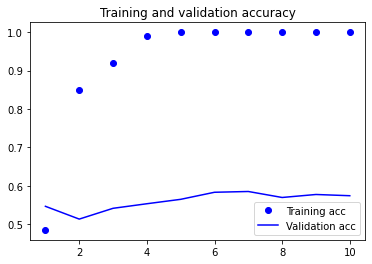

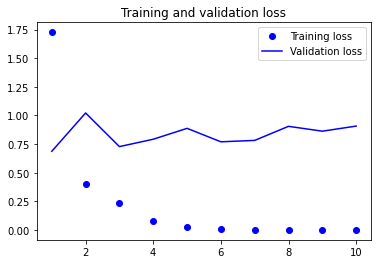

In [7]:
plot_acc_n_loss(history)

Fasttext 300d

In [8]:
fasttext_dir = '../datasets/fasttext'

embeddings_index = {}
f = open(os.path.join(fasttext_dir, 'cc.en.300.vec'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
len(embeddings_index)

2000000

In [9]:
embedding_dim = 300

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [10]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, 
                    epochs=10, batch_size=32, 
                    validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 134ms/step - loss: 0.7809 - acc: 0.5100 - val_loss: 0.7172 - val_acc: 0.4929
Epoch 2/10
7/7 [==============================] - 1s 130ms/step - loss: 0.4455 - acc: 0.7900 - val_loss: 0.9850 - val_acc: 0.4968
Epoch 3/10
7/7 [==============================] - 1s 131ms/step - loss: 0.1965 - acc: 0.9500 - val_loss: 0.8195 - val_acc: 0.5311
Epoch 4/10
7/7 [==============================] - 1s 131ms/step - loss: 0.0590 - acc: 1.0000 - val_loss: 0.8698 - val_acc: 0.5369
Epoch 5/10
7/7 [==============================] - 1s 128ms/step - loss: 0.0224 - acc: 1.0000 - val_loss: 0.9577 - val_acc: 0.5328
Epoch 6/10
7/7 [==============================] - 1s 130ms/step - loss: 0.0123 - acc: 1.0000 - val_loss: 0.9497 - val_acc: 0.5386
Epoch 7/10
7/7 [==============================] - 1s 129ms/step - loss: 0.0070 - acc: 1.0000 - val_loss: 0.9928 - val_acc: 0.5390
Epoch 8/10
7/7 [==============================] - 1s 128ms/step - loss: 0.0042 - acc: 1.00

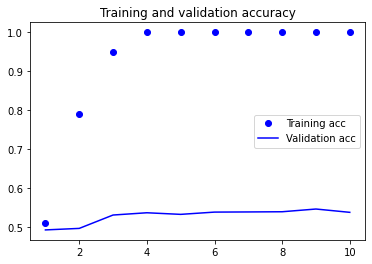

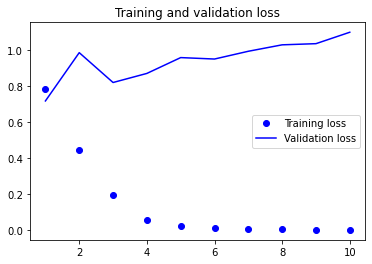

In [11]:
plot_acc_n_loss(history)

Word2vec 300d

In [12]:
from gensim.models import KeyedVectors

wv = KeyedVectors.load_word2vec_format('../datasets/word2vec/GoogleNews-vectors-negative300.bin', binary=True)

In [13]:
embedding_dim = 300

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if word in wv:
        embedding_vector = wv[word]
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [14]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, 
                    epochs=10, batch_size=32, 
                    validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 133ms/step - loss: 0.9812 - acc: 0.4800 - val_loss: 0.6977 - val_acc: 0.4899
Epoch 2/10
7/7 [==============================] - 1s 123ms/step - loss: 0.4952 - acc: 0.7200 - val_loss: 0.7049 - val_acc: 0.5198
Epoch 3/10
7/7 [==============================] - 1s 123ms/step - loss: 0.2457 - acc: 0.9600 - val_loss: 0.6748 - val_acc: 0.5691
Epoch 4/10
7/7 [==============================] - 1s 114ms/step - loss: 0.1162 - acc: 0.9950 - val_loss: 0.9793 - val_acc: 0.4933
Epoch 5/10
7/7 [==============================] - 1s 114ms/step - loss: 0.0483 - acc: 1.0000 - val_loss: 0.6899 - val_acc: 0.5881
Epoch 6/10
7/7 [==============================] - 1s 115ms/step - loss: 0.0216 - acc: 1.0000 - val_loss: 0.7050 - val_acc: 0.5862
Epoch 7/10
7/7 [==============================] - 1s 113ms/step - loss: 0.0111 - acc: 1.0000 - val_loss: 0.7088 - val_acc: 0.5856
Epoch 8/10
7/7 [==============================] - 1s 114ms/step - loss: 0.0061 - acc: 1.00

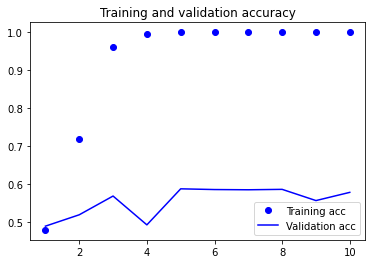

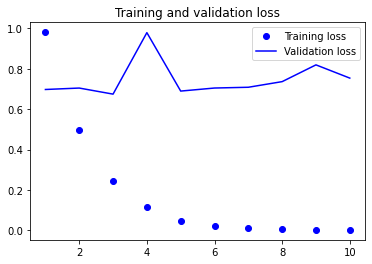

In [15]:
plot_acc_n_loss(history)